# Data Preprocessing

## Masukkan Data

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive


In [31]:
#Load Dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Capstone/Dataset/bank-full.csv', sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Lihat informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
# ambil kolom numerik
numerik = df.select_dtypes(include=['int64', 'float64']).columns
print(numerik)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [37]:
# ambil kolom kategorik
kategorik = df.select_dtypes(include=['object']).columns
print(kategorik)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome', 'y'],
      dtype='object')


## Pembersihan,Scale, dan Labeling data

In [33]:
# Cek Nul
kosong = df.isnull().sum()
print(kosong)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [34]:
# Cek duplicate
duplikasi = df.duplicated().sum()
print(duplikasi)

0


In [35]:
df.drop('contact', axis=1, inplace=True)

In [44]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mmScale = MinMaxScaler()
for col in numerik:
    df[col] = mmScale.fit_transform(df[[col]])
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,0.133333,may,0.053070,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,0.133333,may,0.030704,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,0.133333,may,0.015453,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,0.133333,may,0.018707,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,0.133333,may,0.040260,0.0,0.0,0.0,unknown,no


In [45]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in kategorik:
    df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,0.133333,8,0.053070,0.0,0.0,0.0,3,0
1,0.337662,9,2,1,0,0.073067,1,0,0.133333,8,0.030704,0.0,0.0,0.0,3,0
2,0.194805,2,1,1,0,0.072822,1,1,0.133333,8,0.015453,0.0,0.0,0.0,3,0
3,0.376623,1,1,3,0,0.086476,1,0,0.133333,8,0.018707,0.0,0.0,0.0,3,0
4,0.194805,11,2,3,0,0.072812,0,0,0.133333,8,0.040260,0.0,0.0,0.0,3,0


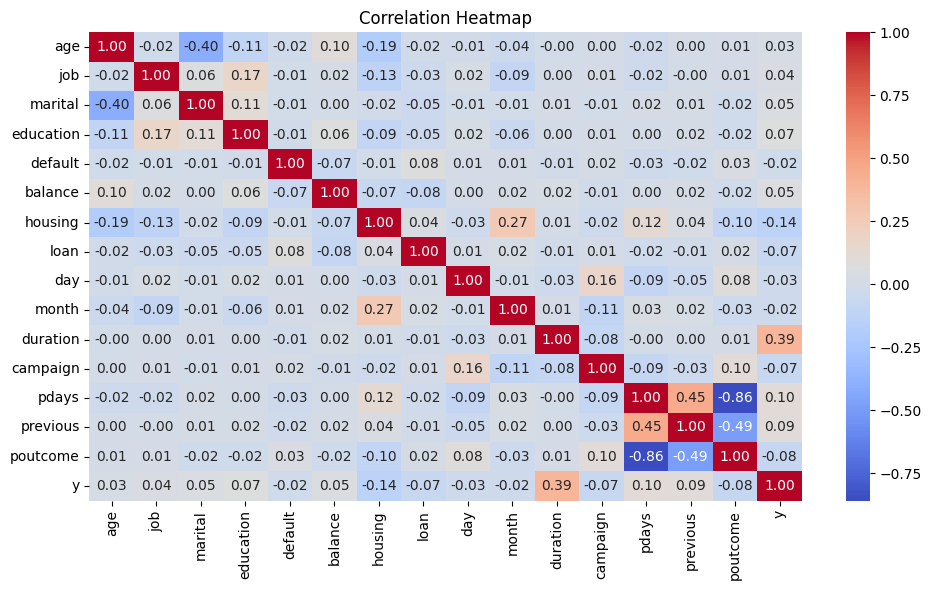

In [47]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()